In [3]:
import os
import random
import seaborn as sns
import csv
import numpy as np
import copy
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import pandas as pd
from scipy import stats
%matplotlib inline

file_path="C:/Users/Zeta/Documents/acou_sommeil_HD_ENS/tinnitus-nocturnal-stimulation"

# Récupération des données depuis les CSV

In [4]:
df_matin={}
os.chdir(file_path+"/df_matin")
files = os.listdir(file_path+"/df_matin")
for file in files:
    df_matin[file.split("_")[0]]=pd.read_csv(file, sep=";")
print("exemple matin")
print(df_matin["1ZN04"])

print("")

df_soir={}
os.chdir(file_path+"/df_soir")
files = os.listdir(file_path+"/df_soir")
for file in files:
    df_soir[file.split("_")[0]]=pd.read_csv(file, sep=";")
print("exemple soir")
print(df_soir["1ZN04"])

exemple matin
   Patient ID  relative date  masking volume  VAS-L  VAS-I  \
0       1ZN04            -22        7.333333    2.0    1.0   
1       1ZN04            -21        5.000000    3.0    2.0   
2       1ZN04            -21        5.000000    3.0    2.0   
3       1ZN04            -20        5.666667    NaN    NaN   
4       1ZN04            -19        5.000000    4.0    3.0   
5       1ZN04            -18        4.666667    5.0    3.0   
6       1ZN04            -17        4.666667    3.0    2.0   
7       1ZN04            -16        4.666667    2.0    2.0   
8       1ZN04            -15        5.333333    3.0    3.0   
9       1ZN04             -3        4.000000    4.0    2.0   
10      1ZN04             -1        5.333333    3.0    2.0   
11      1ZN04              0        4.666667    3.0    2.0   
12      1ZN04              2        4.666667    3.0    1.0   
13      1ZN04              3        5.333333    3.0    2.0   
14      1ZN04              4        4.333333    3.0    2

# Travail sur le masquage

# Test inter-sujet entre distribution post habituation et distribution post intervention

In [5]:
#On calcule directement la distribution des différences plutôt que de prendre 2 distributions pairées
distrib_test_moins_hab_matin=[]
distrib_test_moins_hab_soir=[]

# Pour l'affichage
distrib_hab_matin=[]
distrib_test_matin=[]
distrib_hab_soir=[]
distrib_test_soir=[]

for elm in df_matin:
    flag=0
    for index, row in df_matin[elm].iterrows():
        if row["relative date"] == -1:
            distrib_hab_matin.append(float(row["masking volume"]))
            flag+=1
        if row["relative date"] == 0:
            distrib_test_matin.append(float(row["masking volume"]))
            flag+=1
        if flag==2:
            distrib_test_moins_hab_matin.append(distrib_test_matin[-1]- distrib_hab_matin[-1])
            break
            
print(distrib_test_moins_hab_matin)
print(len(distrib_test_moins_hab_matin))


for elm in df_soir:
    flag=0
    for index, row in df_soir[elm].iterrows():
        if row["relative date"] == -1:
            distrib_hab_soir.append(float(row["masking volume"]))
            flag+=1
        if row["relative date"] == 0:
            distrib_test_soir.append(float(row["masking volume"]))
            flag+=1
        if flag==2:
            distrib_test_moins_hab_soir.append(distrib_test_soir[-1]- distrib_hab_soir[-1])
            break
            
print(distrib_test_moins_hab_soir)
print(len(distrib_test_moins_hab_soir))




[-16.333333333333332, -0.33333333333333304, -4.0, -18.33333333333333, 0.0, -10.0, -1.0, -11.333333333333329, 10.666666666666671, 8.333333333333332, -15.666666666666657, -1.666666666666667, -1.9999999999999991, -0.6666666666666661]
14
[-10.666666666666664, 0.0, -1.6666666666666572, -4.3333333333333215, -4.9999999999999964, -14.333333333333329, 9.666666666666671, -2.0, 8.666666666666671, 9.333333333333329, 1.0000000000000004, 0.0, 0.6666666666666661]
13


# Affichage des distributions

Text(0.5, 1.0, 'Distribution of differences of masking volume between habituation evening and post intervention evening')

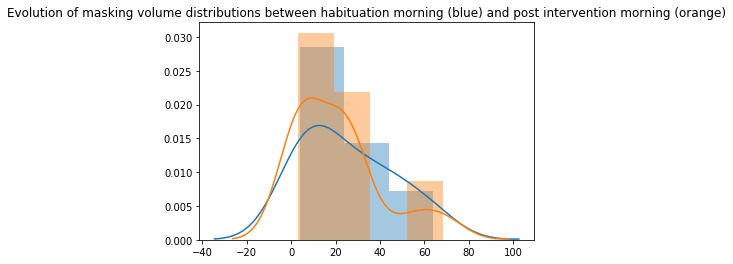

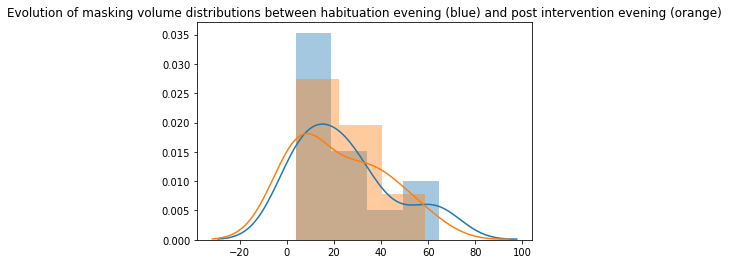

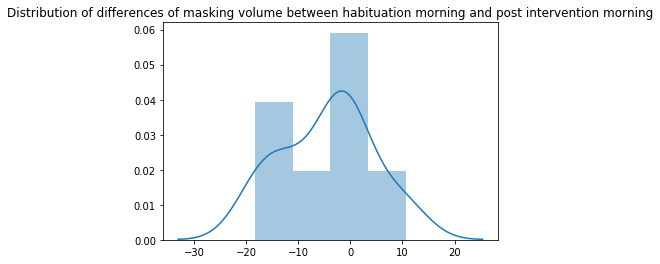

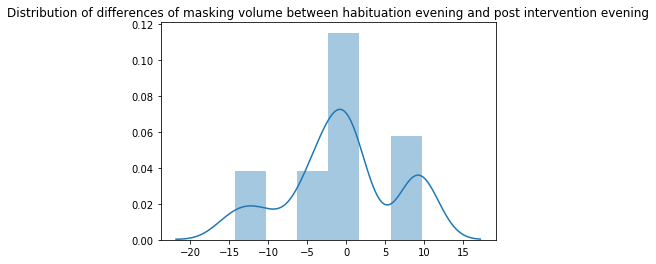

In [6]:
# Evolution des distributions sans pairing
plt.figure()
sns.distplot(distrib_hab_matin)
sns.distplot(distrib_test_matin)
plt.title("Evolution of masking volume distributions between habituation morning (blue) and post intervention morning (orange)")

plt.figure()
sns.distplot(distrib_hab_soir)
sns.distplot(distrib_test_soir)
plt.title("Evolution of masking volume distributions between habituation evening (blue) and post intervention evening (orange)")

#Représentation des distribution des différences
plt.figure()
sns.distplot(distrib_test_moins_hab_matin)
plt.title("Distribution of differences of masking volume between habituation morning and post intervention morning")

plt.figure()
sns.distplot(distrib_test_moins_hab_soir)
plt.title("Distribution of differences of masking volume between habituation evening and post intervention evening")



# Test statistiques

In [7]:
print("Pour matin hab VS matin test")
print(stats.ttest_1samp(distrib_test_moins_hab_matin, 0))
print(stats.wilcoxon(distrib_test_moins_hab_matin))

print("Pour soir hab VS soir test")
print(stats.ttest_1samp(distrib_test_moins_hab_soir, 0))
print(stats.wilcoxon(distrib_test_moins_hab_soir))

Pour matin hab VS matin test
Ttest_1sampResult(statistic=-1.8930237572272404, pvalue=0.08082916041898561)
WilcoxonResult(statistic=16.0, pvalue=0.03924327615032667)
Pour soir hab VS soir test
Ttest_1sampResult(statistic=-0.33410762783382136, pvalue=0.7440648846050348)
WilcoxonResult(statistic=27.0, pvalue=0.5937116848746409)


# Le t test n'est pas significatif, mais il est 2 sided pour l'instant, alors que nos hypothèses suggèrent une réduction de l'acouphène, donc on devrait pouvoir faire un test one sided, ce qui diviserait la p-value par 2, à notre avantage, let  test deviendrait significatif.

# Travail sur les VAS

In [8]:
#On calcule directement la distribution des différences plutôt que de prendre 2 distributions pairées
distrib_test_moins_hab_VAS_L=[]
distrib_test_moins_hab_VAS_I=[]

# Pour l'affichage
distrib_hab_VAS_L=[]
distrib_test_VAS_L=[]
distrib_hab_VAS_I=[]
distrib_test_VAS_I=[]

for elm in df_matin:
    flag=0
    for index, row in df_matin[elm].iterrows():
        if row["relative date"] == -1:
            distrib_hab_VAS_L.append(float(row["VAS-L"]))
            distrib_hab_VAS_I.append(float(row["VAS-I"]))
            flag+=1
        if row["relative date"] == 0:
            distrib_test_VAS_L.append(float(row["VAS-L"]))
            distrib_test_VAS_I.append(float(row["VAS-I"]))
            flag+=1
        if flag==2:
            distrib_test_moins_hab_VAS_L.append(distrib_test_VAS_L[-1]- distrib_hab_VAS_L[-1])
            distrib_test_moins_hab_VAS_I.append(distrib_test_VAS_I[-1]- distrib_hab_VAS_I[-1])
            break
            
print(distrib_test_moins_hab_VAS_L)
print(len(distrib_test_moins_hab_VAS_L))

print(distrib_test_moins_hab_VAS_I)
print(len(distrib_test_moins_hab_VAS_I))

[-4.0, -2.0, -1.0, -3.0, 0.0, 0.0, 0.0, -2.0, 1.0, 2.0, 0.0, 0.0, -1.0, 0.0]
14
[-3.0, -3.0, 0.0, -3.0, 1.0, 3.0, 0.0, -2.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0]
14


# Affichage des distributions

Text(0.5, 1.0, 'Distribution of differences of VAS_I between habituation morning and post intervention morning')

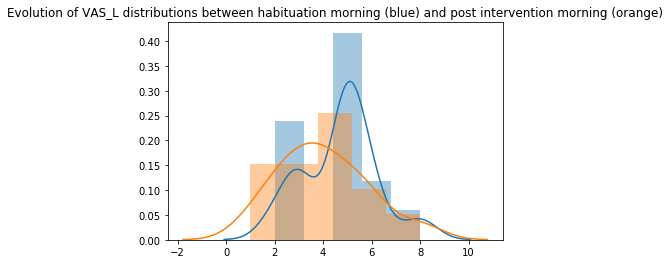

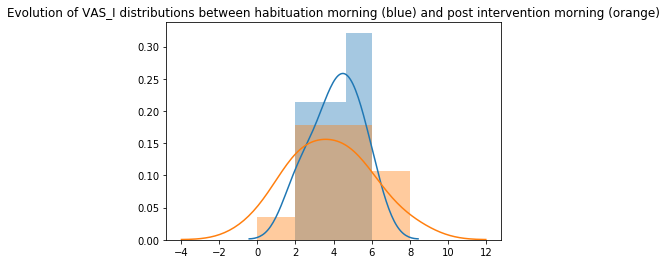

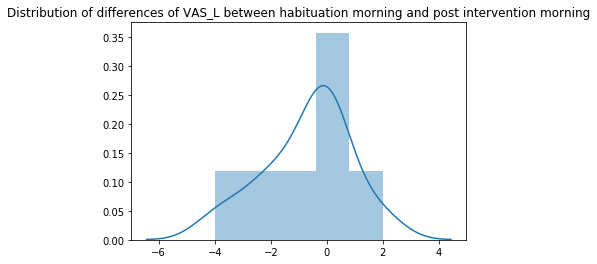

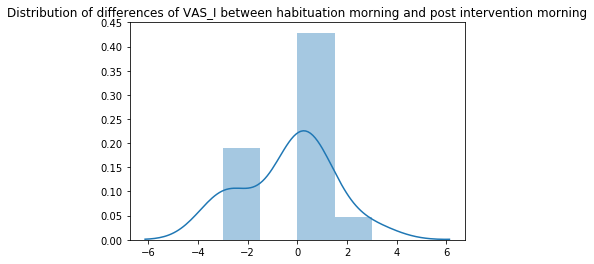

In [9]:
# Evolution des distributions sans pairing
plt.figure()
sns.distplot(distrib_hab_VAS_L)
sns.distplot(distrib_test_VAS_L)
plt.title("Evolution of VAS_L distributions between habituation morning (blue) and post intervention morning (orange)")

plt.figure()
sns.distplot(distrib_hab_VAS_I)
sns.distplot(distrib_test_VAS_I)
plt.title("Evolution of VAS_I distributions between habituation morning (blue) and post intervention morning (orange)")

#Représentation des distribution des différences
plt.figure()
sns.distplot(distrib_test_moins_hab_VAS_L)
plt.title("Distribution of differences of VAS_L between habituation morning and post intervention morning")

plt.figure()
sns.distplot(distrib_test_moins_hab_VAS_I)
plt.title("Distribution of differences of VAS_I between habituation morning and post intervention morning")



# Tests statistiques

In [10]:
print("Pour VAS_L matin hab VS matin test")
print(stats.ttest_1samp(distrib_test_moins_hab_VAS_L, 0))
print(stats.wilcoxon(distrib_test_moins_hab_VAS_L))

print("Pour VAS_I matin hab VS matin test")
print(stats.ttest_1samp(distrib_test_moins_hab_VAS_I, 0))
print(stats.wilcoxon(distrib_test_moins_hab_VAS_I))

Pour VAS_L matin hab VS matin test
Ttest_1sampResult(statistic=-1.6810969503635829, pvalue=0.11659718557792907)
WilcoxonResult(statistic=7.0, pvalue=0.11979493042591832)
Pour VAS_I matin hab VS matin test
Ttest_1sampResult(statistic=-0.7505053179263302, pvalue=0.4663181240369474)
WilcoxonResult(statistic=12.5, pvalue=0.43320586241890346)


C:\Users\Zeta\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2778: UserWarning: Warning: sample size too small for normal approximation.
  warnings.warn("Warning: sample size too small for normal approximation.")


In [43]:
# Dommage, pas significatif

In [45]:
# Suite du travail : 
#1) tests stats par rapport à la "distribution de référence"
# 2) Tests en intra-sujet et combinaison des p_vals